In [1]:
import os
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [2]:
sns.set()
import warnings
warnings.filterwarnings('ignore')
path_store='C:/Users/chuna/Downloads/week5/store.csv'
path_train='C:/Users/chuna/Downloads/week5/train.csv'
path_test='C:/Users/chuna/Downloads/week5/test.csv'
isFile = os.path.isfile(path_train) 
print(isFile)                           

df_store = pd.read_csv(path_store)
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train


True


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
df_train = df_train.sort_values('Date')
df_store.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [4]:
df_store.isnull().values.any()

True

In [5]:
df_train_season=df_train.copy()


In [6]:
def clean(x1,y1):
    
    x1.loc[x1[y1] < x1[y1].quantile(.15), y1] =None
    
    
    x1.loc[x1[y1] > x1[y1].quantile(.85), y1] =None
   
    x1[y1].fillna(x1[y1].mean(),inplace = True)
    x1.isnull().sum()
   
   
    return x1


y1='Sales'
df_train_season = clean (df_train_season,y1)



In [7]:
df_train_season

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0.000000,0,0,0,a,1
1016473,379,2,2013-01-01,0.000000,0,0,0,a,1
1016472,378,2,2013-01-01,0.000000,0,0,0,a,1
1016471,377,2,2013-01-01,0.000000,0,0,0,a,1
1016470,376,2,2013-01-01,0.000000,0,0,0,a,1
...,...,...,...,...,...,...,...,...,...
745,746,5,2015-07-31,9082.000000,638,1,1,0,1
746,747,5,2015-07-31,4674.253997,826,1,1,0,1
747,748,5,2015-07-31,7481.000000,578,1,1,0,1
741,742,5,2015-07-31,4674.253997,1016,1,1,0,1


In [8]:
df_train_season_store = df_train_season.groupby('Store')
df_train_season_store.get_group(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0.0,0,0,0,a,1
1014980,1,3,2013-01-02,5530.0,668,1,0,0,1
1013865,1,4,2013-01-03,4327.0,578,1,0,0,1
1012750,1,5,2013-01-04,4486.0,619,1,0,0,1
1011635,1,6,2013-01-05,4997.0,635,1,0,0,1
...,...,...,...,...,...,...,...,...,...
4460,1,1,2015-07-27,6102.0,612,1,1,0,1
3345,1,2,2015-07-28,5011.0,560,1,1,0,1
2230,1,3,2015-07-29,4782.0,523,1,1,0,1
1115,1,4,2015-07-30,5020.0,546,1,1,0,1


In [9]:
df_train_season['Date'].min(), df_train_season['Date'].max()
df_train_season['Date']=pd.to_datetime(df_train_season['Date'])


In [10]:
furniture = df_train_season.groupby('Date')['Sales'].sum().reset_index()

In [11]:
furniture = furniture.set_index('Date')
furniture.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [12]:
y=furniture
y.isnull().sum()

Sales    0
dtype: int64

In [13]:
y = furniture['Sales'].resample('MS').mean()



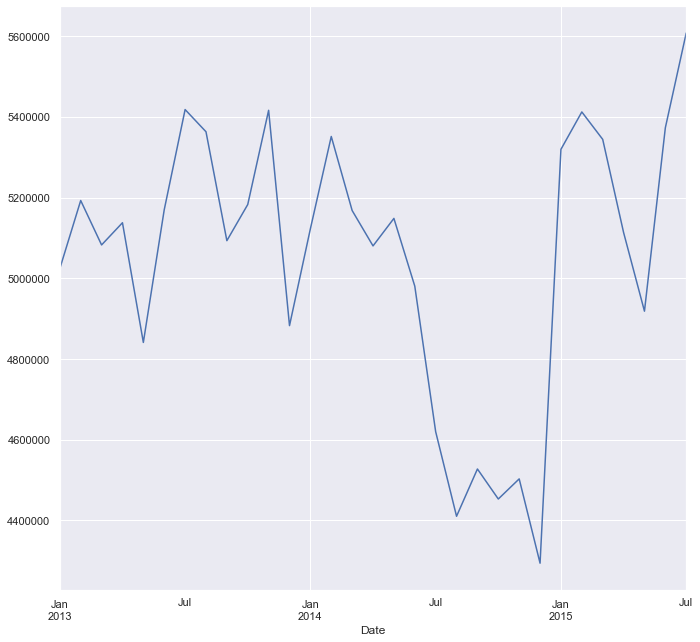

In [14]:
y.plot(figsize=(10, 10))
plt.show()

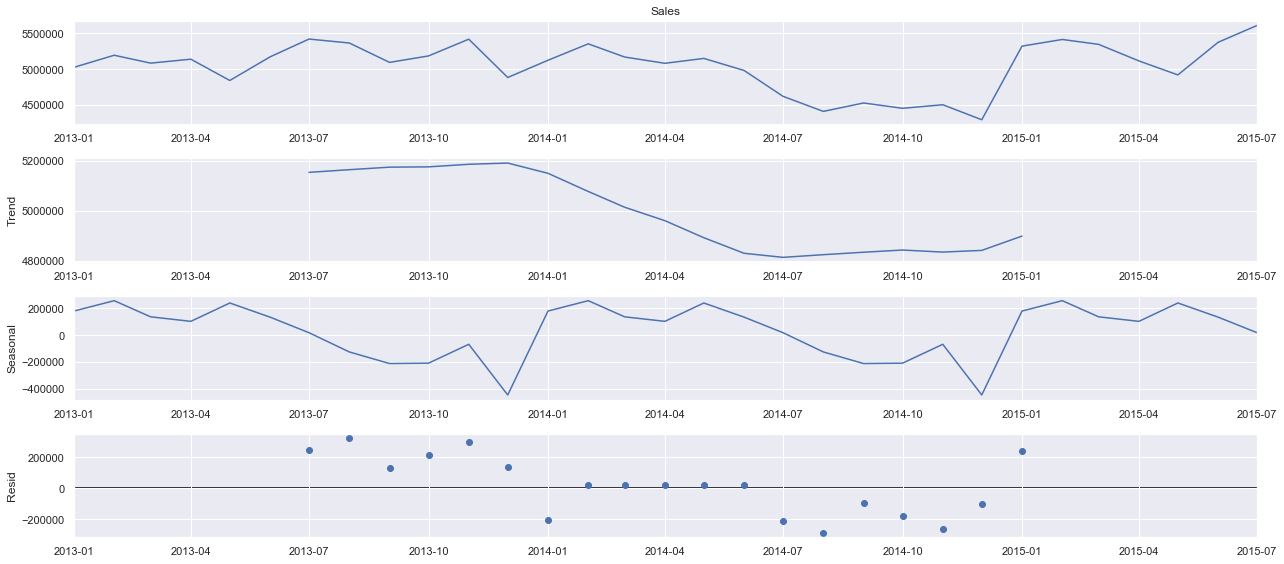

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
df_store
df_store = df_store.set_index('Store')
df_store

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
df_store['CompetitionDistance'].quantile(.15) #Near

350.0

In [18]:
df_store['CompetitionDistance'].quantile(.85) #far

11494.500000000002

In [19]:
df_store['CompetitionDistance'].quantile(.25)#medium

717.5

In [20]:
df_store

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [21]:
df_store.loc[df_store['CompetitionDistance'] <= 350, 'distance'] = 'Near' 
df_store.loc[df_store['CompetitionDistance'] > 11494, 'distance'] = 'Far'


In [22]:
df_store['distance']=df_store['distance'].fillna('Medium')

df_store

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,distance
Store,,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Medium
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Medium
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Far
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,Medium
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,Far
...,...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Medium
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,Medium
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,Medium


In [23]:
df_train 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1
...,...,...,...,...,...,...,...,...,...
745,746,5,2015-07-31,9082,638,1,1,0,1
746,747,5,2015-07-31,10708,826,1,1,0,1
747,748,5,2015-07-31,7481,578,1,1,0,1
741,742,5,2015-07-31,10460,1016,1,1,0,1


In [24]:
df_store

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,distance
Store,,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Medium
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Medium
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Far
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,Medium
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,Far
...,...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Medium
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,Medium
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,Medium


In [25]:
df_train
df_train = df_train.set_index('Store')
df_train

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1115,2,2013-01-01,0,0,0,0,a,1
379,2,2013-01-01,0,0,0,0,a,1
378,2,2013-01-01,0,0,0,0,a,1
377,2,2013-01-01,0,0,0,0,a,1
376,2,2013-01-01,0,0,0,0,a,1
...,...,...,...,...,...,...,...,...
746,5,2015-07-31,9082,638,1,1,0,1
747,5,2015-07-31,10708,826,1,1,0,1
748,5,2015-07-31,7481,578,1,1,0,1


In [26]:
f=pd.merge(df_train, df_store, left_index=True, right_index=True)
f

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,distance
Store,,,,,,,,,,,,,,,,,,
1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Medium
1,3,2013-01-02,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Medium
1,4,2013-01-03,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Medium
1,5,2013-01-04,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Medium
1,6,2013-01-05,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1,2015-07-27,10712,608,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Medium
1115,2,2015-07-28,8093,500,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Medium
1115,3,2015-07-29,7661,473,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Medium


In [27]:
f['store'] = f.index

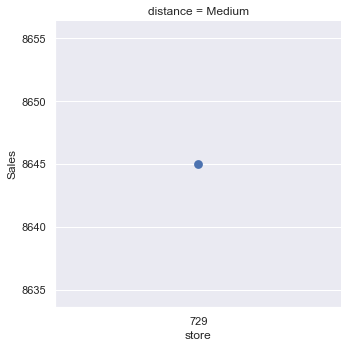

In [28]:
sns.factorplot(data = f.sample(), x ="store", y = "Sales", 
               col = 'distance')

In [29]:
df_train.tail()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
746,5,2015-07-31,9082,638,1,1,0,1
747,5,2015-07-31,10708,826,1,1,0,1
748,5,2015-07-31,7481,578,1,1,0,1
742,5,2015-07-31,10460,1016,1,1,0,1
1,5,2015-07-31,5263,555,1,1,0,1
